# Import Library

In [ ]:
import pandas as pd                 # lib used to perform data frame manipulation and advaced analysis
import numpy as np                  # lib used for working with arrays
import matplotlib.pyplot as plt     # lib for creating static, animated, and interactive visualizations
import seaborn as sns               # lib that provides a high-level interface for drawing attractive and informative statistical graphics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Import Dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Aug22 - FSDA - Paris - Alvino Wirapratama/Python/Copy of users.csv"
df = pd.read_csv(path)
df

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


In [ ]:
path = "/content/drive/MyDrive/Aug22 - FSDA - Paris - Alvino Wirapratama/Python/Copy of daily_user_balance_sep21.csv"
df_balance = pd.read_csv(path)
df_balance

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,132,277.0","10,000,000.0",NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,206,945.0","10,000,000.0",0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,956,556.0","10,000,000.0",0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,914,858.0","10,000,000.0",0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,016,360.0","10,000,000.0",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,"10,001.0","10,000.0",NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,"41,625.0","40,000.0",NaN,"10,001.0","10,000.0",NaN,"49,869.0","50,000.0",NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,"9,987.0","10,000.0",NaN,NaN,NaN,NaN


# Join Dataset

In [ ]:
df_join = df.merge(df_balance,how='inner',left_on='user_id', right_on='user_id')
df_join

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,Saham_AUM,...,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,2021-08-17,"189,109.0",...,NaN,"40,012.0","40,000.0",NaN,"270,084.0","270,000.0",NaN,NaN,NaN,NaN
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,2021-08-18,"188,542.0",...,0.0,"40,022.0","40,000.0",0.0,"270,399.0","270,000.0",0.0,NaN,NaN,NaN
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,2021-08-19,"185,228.0",...,0.0,"40,028.0","40,000.0",0.0,"270,426.0","270,000.0",0.0,NaN,NaN,NaN
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,2021-08-20,"184,354.0",...,0.0,"40,034.0","40,000.0",0.0,"270,175.0","270,000.0",0.0,NaN,NaN,NaN
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,2021-08-23,"186,365.0",...,0.0,"40,047.0","40,000.0",0.0,"270,315.0","270,000.0",0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis,2021-09-24,"9,900,685.0",...,0.0,"10,112,541.0","10,100,000.0",0.0,"40,989,215.0","41,000,000.0",0.0,NaN,NaN,NaN
158807,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis,2021-09-27,"9,911,149.0",...,0.0,"10,116,412.0","10,100,000.0",0.0,"41,010,237.0","41,000,000.0",0.0,NaN,NaN,NaN
158808,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis,2021-09-28,"10,018,447.0",...,0.0,"10,117,871.0","10,100,000.0",0.0,"41,013,869.0","41,000,000.0",0.0,NaN,NaN,NaN
158809,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis,2021-09-29,"20,161,402.0",...,"10,000,000.0","10,119,204.0","10,100,000.0",0.0,"40,998,525.0","41,000,000.0",0.0,NaN,NaN,NaN


In [ ]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   registration_import_datetime         158811 non-null  object 
 2   user_gender                          158811 non-null  object 
 3   user_age                             158811 non-null  int64  
 4   user_occupation                      158811 non-null  object 
 5   user_income_range                    158811 non-null  object 
 6   referral_code_used                   51371 non-null   object 
 7   user_income_source                   158811 non-null  object 
 8   date                                 158811 non-null  object 
 9   Saham_AUM                            106292 non-null  float64
 10  Saham_invested_amount                106292 non-null  float64
 11  Saham_transac

# Time series manipulation

In [ ]:
# rubah dtype user_id jadi string
df_join['user_id'] = df_join['user_id'].astype(str)

# rubah dtype registration_import_datetime jadi  datetime
df_join['registration_import_datetime'] = pd.to_datetime(df_join['registration_import_datetime']).dt.normalize()


# rubah dtype date jadi datetime
df_join['date'] = pd.to_datetime(df_balance['date'])

In [ ]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   registration_import_datetime         158811 non-null  datetime64[ns]
 2   user_gender                          158811 non-null  object        
 3   user_age                             158811 non-null  int64         
 4   user_occupation                      158811 non-null  object        
 5   user_income_range                    158811 non-null  object        
 6   referral_code_used                   51371 non-null   object        
 7   user_income_source                   158811 non-null  object        
 8   date                                 158811 non-null  datetime64[ns]
 9   Saham_AUM                            106292 non-null  float64       
 

In [ ]:
#make column names lowercase for ease of readability and further processing
df_join.columns = df_join.columns.str.lower()
df_join.columns

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'date', 'saham_aum', 'saham_invested_amount',
       'saham_transaction_amount', 'pasar_uang_aum',
       'pasar_uang_invested_amount', 'pasar_uang_transaction_amount',
       'pendapatan_tetap_aum', 'pendapatan_tetap_invested_amount',
       'pendapatan_tetap_transaction_amount', 'campuran_aum',
       'campuran_invested_amount', 'campuran_transaction_amount'],
      dtype='object')

# Data Cleaning

## missing data

In [ ]:
# replace Null on referral_code_used column
df_join["referral_code_used"].fillna("not used referral", inplace = True)

#  replace null on saham, pasar, uang, pendapatan, campuran to 0 because simply they have no mutual fund
df_join = df_join.fillna(0)

df_join.isna().sum()

user_id                                0
registration_import_datetime           0
user_gender                            0
user_age                               0
user_occupation                        0
user_income_range                      0
referral_code_used                     0
user_income_source                     0
date                                   0
saham_aum                              0
saham_invested_amount                  0
saham_transaction_amount               0
pasar_uang_aum                         0
pasar_uang_invested_amount             0
pasar_uang_transaction_amount          0
pendapatan_tetap_aum                   0
pendapatan_tetap_invested_amount       0
pendapatan_tetap_transaction_amount    0
campuran_aum                           0
campuran_invested_amount               0
campuran_transaction_amount            0
dtype: int64

## typos

In [ ]:
#16 tampilin unique value berdasarkan columns untuk sanity check typo
for i in df_join.columns:
  unique_data = df_join[i].value_counts()
  print(unique_data,'\n') # \n artinya Enter

3740513    42
3727676    42
3740149    42
3731825    42
3737134    42
           ..
4142184     1
4128311     1
4137810     1
4154727     1
4118823     1
Name: user_id, Length: 8277, dtype: int64 

2021-08-06    7466
2021-08-05    6283
2021-08-07    5511
2021-08-01    5223
2021-08-04    5032
2021-08-02    4974
2021-08-29    4902
2021-08-03    4869
2021-08-08    4829
2021-08-09    4692
2021-08-11    4136
2021-08-10    4129
2021-08-12    3921
2021-08-31    3768
2021-09-01    3730
2021-08-13    3643
2021-08-15    3488
2021-08-19    3467
2021-08-18    3409
2021-08-16    3280
2021-08-23    3195
2021-08-14    3129
2021-08-22    3113
2021-08-26    2977
2021-08-30    2966
2021-08-20    2939
2021-08-17    2857
2021-09-02    2839
2021-08-24    2833
2021-08-25    2778
2021-08-27    2743
2021-08-21    2652
2021-09-04    2597
2021-09-03    2536
2021-09-08    2453
2021-09-06    2415
2021-09-05    2395
2021-09-07    2281
2021-09-09    1899
2021-09-13    1809
2021-09-10    1762
2021-09-14    1718
2021

## duplicates

In [ ]:
# check apakah ada yang duplicates
df_join.duplicated().sum()

2874

In [ ]:
# drop duplicates
df_join.drop_duplicates(inplace = True)

# check duplicated data
df_join.duplicated().sum()

0

## outliers

In [ ]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155937 entries, 0 to 158810
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              155937 non-null  object        
 1   registration_import_datetime         155937 non-null  datetime64[ns]
 2   user_gender                          155937 non-null  object        
 3   user_age                             155937 non-null  int64         
 4   user_occupation                      155937 non-null  object        
 5   user_income_range                    155937 non-null  object        
 6   referral_code_used                   155937 non-null  object        
 7   user_income_source                   155937 non-null  object        
 8   date                                 155937 non-null  datetime64[ns]
 9   saham_aum                            155937 non-null  float64       
 

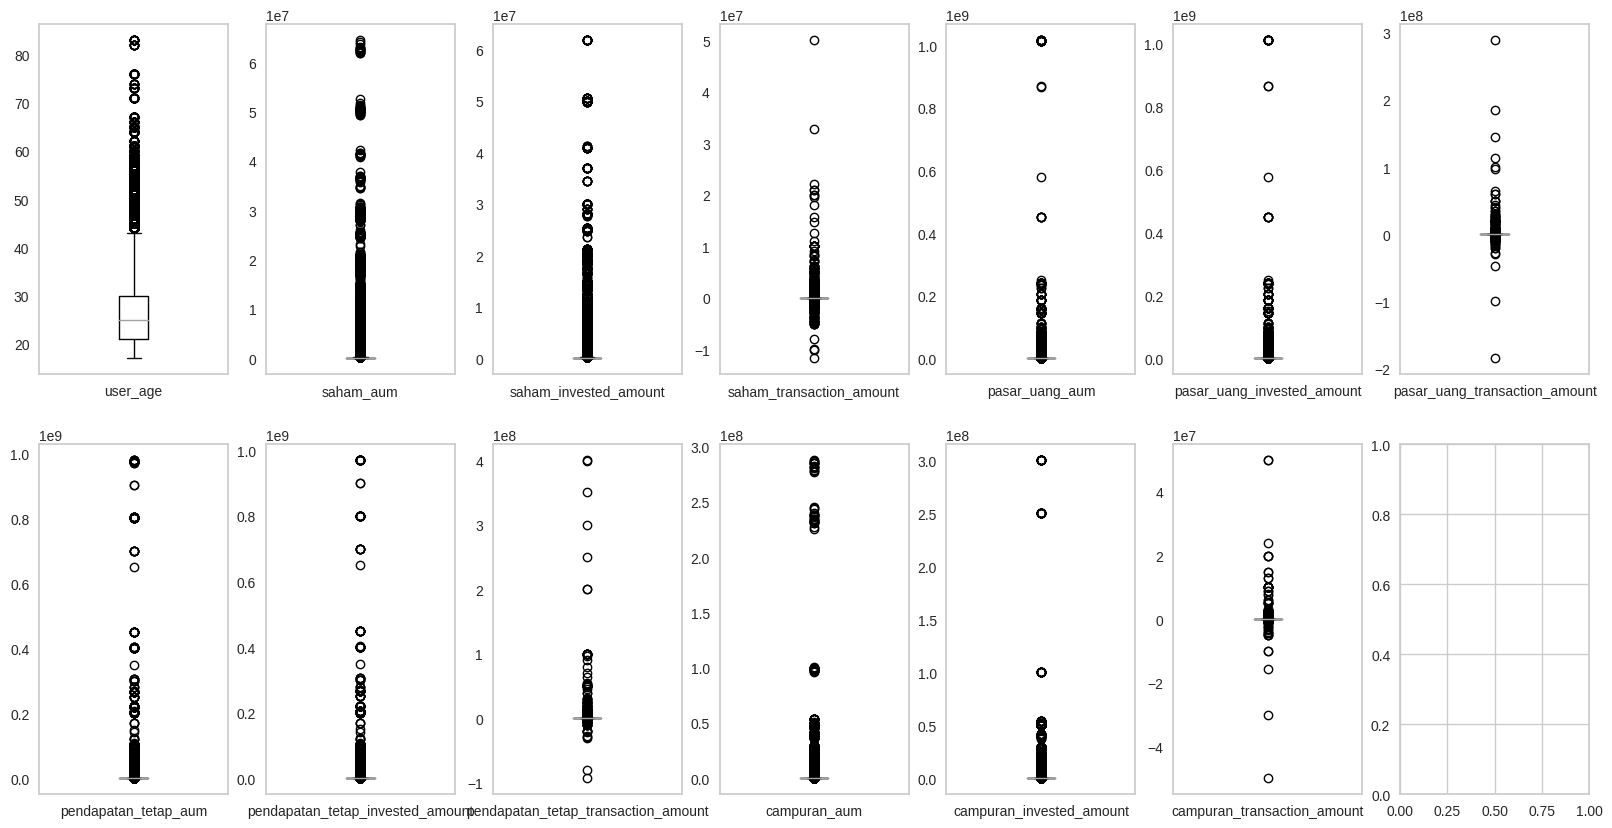

In [ ]:
# check outlier
numerical_column = ['user_age', 'saham_aum', 'saham_invested_amount', 'saham_transaction_amount',
                    'pasar_uang_aum', 'pasar_uang_invested_amount','pasar_uang_transaction_amount',
                    'pendapatan_tetap_aum','pendapatan_tetap_invested_amount','pendapatan_tetap_transaction_amount',
                    'campuran_aum','campuran_invested_amount','campuran_transaction_amount']

fig, axes = plt.subplots(nrows=2, ncols=7,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_join.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
# Detect Outliers
Q1 = df_join['user_age'].quantile(0.25)
Q3 = df_join['user_age'].quantile(0.75)
IQR = Q3 - Q1

LIF = Q1 - 1.5 * IQR # lower inner fence
UIF = Q3 + 1.5 * IQR # upper inner fence

name = ['Q1','Q3','IQR','LIF','UIF']
value = [Q1, Q3, IQR, LIF, UIF]

for i in range(len(name)):
  print(f'  {name[i]}  :  {value[i]}')

  Q1  :  21.0
  Q3  :  30.0
  IQR  :  9.0
  LIF  :  7.5
  UIF  :  43.5


In [ ]:
# Remove Outliers
f_lif = df_join['user_age'] < LIF
f_uif = df_join['user_age'] > UIF
df_join = df_join.loc[~(f_lif | f_uif)]

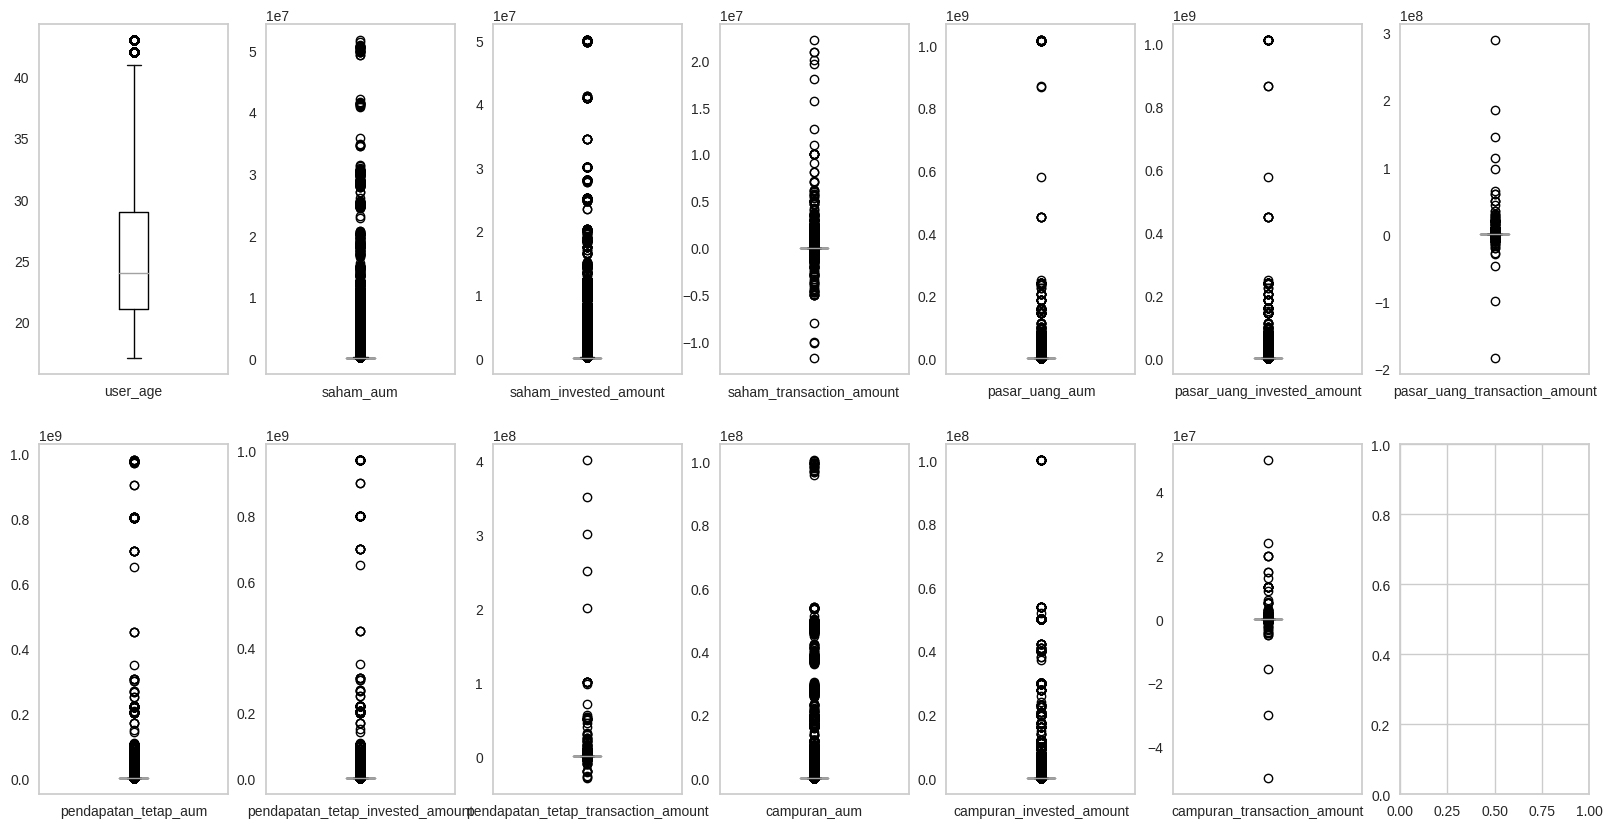

In [ ]:
# check outlier
numerical_column = ['user_age', 'saham_aum', 'saham_invested_amount', 'saham_transaction_amount',
                    'pasar_uang_aum', 'pasar_uang_invested_amount','pasar_uang_transaction_amount',
                    'pendapatan_tetap_aum','pendapatan_tetap_invested_amount','pendapatan_tetap_transaction_amount',
                    'campuran_aum','campuran_invested_amount','campuran_transaction_amount']

fig, axes = plt.subplots(nrows=2, ncols=7,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_join.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
df_join

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,saham_aum,...,saham_transaction_amount,pasar_uang_aum,pasar_uang_invested_amount,pasar_uang_transaction_amount,pendapatan_tetap_aum,pendapatan_tetap_invested_amount,pendapatan_tetap_transaction_amount,campuran_aum,campuran_invested_amount,campuran_transaction_amount
5396,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-08,"186,506.0",...,0.0,"40,007.0","40,000.0",0.0,"269,650.0","270,000.0",0.0,0.0,0.0,0.0
5397,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-09,"188,270.0",...,0.0,"40,004.0","40,000.0",0.0,"269,483.0","270,000.0",0.0,0.0,0.0,0.0
5398,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-10,"189,251.0",...,0.0,"39,992.0","40,000.0",0.0,"269,874.0","270,000.0",0.0,0.0,0.0,0.0
5399,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-13,"188,654.0",...,0.0,"39,999.0","40,000.0",0.0,"269,932.0","270,000.0",0.0,0.0,0.0,0.0
5400,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-14,"190,087.0",...,0.0,"40,005.0","40,000.0",0.0,"270,238.0","270,000.0",0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153995,3745088,2021-08-03,Female,43,Swasta,Rp 10 Juta - 50 Juta,used referral,Gaji,2021-09-28,0.0,...,0.0,"751,365.0","750,000.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0
153996,3745088,2021-08-03,Female,43,Swasta,Rp 10 Juta - 50 Juta,used referral,Gaji,2021-09-29,0.0,...,0.0,0.0,0.0,"-750,000.0",0.0,0.0,0.0,0.0,0.0,0.0
153998,3745088,2021-08-03,Female,43,Swasta,Rp 10 Juta - 50 Juta,used referral,Gaji,2021-09-21,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154002,3745088,2021-08-03,Female,43,Swasta,Rp 10 Juta - 50 Juta,used referral,Gaji,2021-09-27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146147 entries, 5396 to 154003
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              146147 non-null  object        
 1   registration_import_datetime         146147 non-null  datetime64[ns]
 2   user_gender                          146147 non-null  object        
 3   user_age                             146147 non-null  int64         
 4   user_occupation                      146147 non-null  object        
 5   user_income_range                    146147 non-null  object        
 6   referral_code_used                   146147 non-null  object        
 7   user_income_source                   146147 non-null  object        
 8   date                                 146147 non-null  datetime64[ns]
 9   saham_aum                            146147 non-null  float64      

# Transform dataset

In [ ]:
df_join1 = df_join.copy()

# combine aum for each mutual fund
df_join1['total_aum'] = df_join1['saham_aum'] + df_join1['pasar_uang_aum'] + df_join1['pendapatan_tetap_aum'] + df_join1['campuran_aum']

# combine invested for each mutual fund
df_join1['total_invested'] = df_join1['saham_invested_amount'] + df_join1['pasar_uang_invested_amount'] + df_join1['pendapatan_tetap_invested_amount'] + df_join1['campuran_invested_amount']

# combine transaction for each mutual fund
df_join1['total_transaction'] = df_join1['saham_transaction_amount'] + df_join1['pasar_uang_transaction_amount'] + df_join1['pendapatan_tetap_transaction_amount'] + df_join1['campuran_transaction_amount']

# profit
df_join1['profit'] = df_join1['total_aum'] - df_join1['total_invested']

df_join1.drop(['saham_aum','pasar_uang_aum','pendapatan_tetap_aum','campuran_aum',
         'saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount',
         'saham_transaction_amount','pasar_uang_transaction_amount','pendapatan_tetap_transaction_amount','campuran_transaction_amount'],axis=1,inplace=True)

In [ ]:
df_join1

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,total_aum,total_invested,total_transaction,profit
5396,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-08,"496,163.0","500,000.0",0.0,"-3,837.0"
5397,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-09,"497,757.0","500,000.0",0.0,"-2,243.0"
5398,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-10,"499,117.0","500,000.0",0.0,-883.0
5399,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-13,"498,585.0","500,000.0",0.0,"-1,415.0"
5400,2431071,2021-09-03,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used referral,Undian,2021-09-14,"500,330.0","500,000.0",0.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153995,3745088,2021-08-03,Female,43,Swasta,Rp 10 Juta - 50 Juta,used referral,Gaji,2021-09-28,"751,365.0","750,000.0",0.0,"1,365.0"
153996,3745088,2021-08-03,Female,43,Swasta,Rp 10 Juta - 50 Juta,used referral,Gaji,2021-09-29,0.0,0.0,"-750,000.0",0.0
153998,3745088,2021-08-03,Female,43,Swasta,Rp 10 Juta - 50 Juta,used referral,Gaji,2021-09-21,0.0,0.0,0.0,0.0
154002,3745088,2021-08-03,Female,43,Swasta,Rp 10 Juta - 50 Juta,used referral,Gaji,2021-09-27,0.0,0.0,0.0,0.0


In [ ]:
df_join1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146147 entries, 5396 to 154003
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   user_id                       146147 non-null  object        
 1   registration_import_datetime  146147 non-null  datetime64[ns]
 2   user_gender                   146147 non-null  object        
 3   user_age                      146147 non-null  int64         
 4   user_occupation               146147 non-null  object        
 5   user_income_range             146147 non-null  object        
 6   referral_code_used            146147 non-null  object        
 7   user_income_source            146147 non-null  object        
 8   date                          146147 non-null  datetime64[ns]
 9   total_aum                     146147 non-null  float64       
 10  total_invested                146147 non-null  float64       
 11  total_tran

# End Of Period

## Monthly

In [ ]:
# end of period aum, invested, transaction, profit
df_eop = df_join1.groupby([df_join1['user_id'], df_join1['date'].dt.to_period('M'),df_join1['user_age'],
                           df_join1['user_gender'],df_join1['user_occupation'],df_join1['user_income_source'],df_join1['user_income_range']])['total_aum','total_invested','total_transaction','profit'].sum().reset_index()
df_eop

<ipython-input-123-d922ec759929>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_eop = df_join1.groupby([df_join1['user_id'], df_join1['date'].dt.to_period('M'),df_join1['user_age'],


,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit
0,1004326,2021-09,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"6,244,548.0","6,200,000.0",0.0,"44,548.0"
1,1005053,2021-09,31,Male,Swasta,Gaji,> Rp 50 Juta - 100 Juta,"404,275.0","400,000.0",0.0,"4,275.0"
2,1005165,2021-08,22,Female,Pelajar,Undian,< 10 Juta,"798,169.0","800,000.0",0.0,"-1,831.0"
3,1005165,2021-09,22,Female,Pelajar,Undian,< 10 Juta,"1,302,456.0","1,300,000.0",0.0,"2,456.0"
4,1018814,2021-08,20,Male,Others,Undian,< 10 Juta,"15,643,550.0","15,600,000.0","-1,300,000.0","43,550.0"
...,...,...,...,...,...,...,...,...,...,...,...
11403,990466,2021-09,33,Male,Swasta,Gaji,< 10 Juta,"24,474,762.0","24,240,000.0","1,500,000.0","234,762.0"
11404,99245,2021-08,25,Male,Pelajar,Gaji,< 10 Juta,"2,005,032.0","2,000,000.0",0.0,"5,032.0"
11405,99245,2021-09,25,Male,Pelajar,Gaji,< 10 Juta,"9,011,913.0","9,000,000.0",0.0,"11,913.0"
11406,997938,2021-08,27,Male,Others,Gaji,< 10 Juta,"1,454,807.0","1,450,000.0",0.0,"4,807.0"


In [ ]:
# eop (buy/sell/net) setiap mutual fund
# df_net = df_join1.groupby(['user_id', pd.Grouper(key='date', freq='M')]).sum().reset_index()
eop_net = df_join1.groupby([df_join1['user_id'], df_join1['date'].dt.to_period('M')]).sum().reset_index()


eop_net['buy'] = np.where(eop_net['total_transaction'] > 0, eop_net['total_transaction'], 0)

eop_net['sell'] = np.where(eop_net['total_transaction'] < 0, eop_net['total_transaction'], 0)

eop_net['net'] = eop_net['buy'] - eop_net['sell']

eop_net = eop_net[['user_id', 'date', 'buy', 'sell', 'net']]
eop_net

<ipython-input-124-aa7b9dc6c1af>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  eop_net = df_join1.groupby([df_join1['user_id'], df_join1['date'].dt.to_period('M')]).sum().reset_index()


,user_id,date,buy,sell,net
0,1004326,2021-09,0.0,0.0,0.0
1,1005053,2021-09,0.0,0.0,0.0
2,1005165,2021-08,0.0,0.0,0.0
3,1005165,2021-09,0.0,0.0,0.0
4,1018814,2021-08,0.0,"-1,300,000.0","1,300,000.0"
...,...,...,...,...,...
11403,990466,2021-09,"1,500,000.0",0.0,"1,500,000.0"
11404,99245,2021-08,0.0,0.0,0.0
11405,99245,2021-09,0.0,0.0,0.0
11406,997938,2021-08,0.0,0.0,0.0


In [ ]:
df_eop = df_eop.merge(eop_net,how='left',left_on=['user_id','date'], right_on=['user_id','date'])
df_eop

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
0,1004326,2021-09,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"6,244,548.0","6,200,000.0",0.0,"44,548.0",0.0,0.0,0.0
1,1005053,2021-09,31,Male,Swasta,Gaji,> Rp 50 Juta - 100 Juta,"404,275.0","400,000.0",0.0,"4,275.0",0.0,0.0,0.0
2,1005165,2021-08,22,Female,Pelajar,Undian,< 10 Juta,"798,169.0","800,000.0",0.0,"-1,831.0",0.0,0.0,0.0
3,1005165,2021-09,22,Female,Pelajar,Undian,< 10 Juta,"1,302,456.0","1,300,000.0",0.0,"2,456.0",0.0,0.0,0.0
4,1018814,2021-08,20,Male,Others,Undian,< 10 Juta,"15,643,550.0","15,600,000.0","-1,300,000.0","43,550.0",0.0,"-1,300,000.0","1,300,000.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11403,990466,2021-09,33,Male,Swasta,Gaji,< 10 Juta,"24,474,762.0","24,240,000.0","1,500,000.0","234,762.0","1,500,000.0",0.0,"1,500,000.0"
11404,99245,2021-08,25,Male,Pelajar,Gaji,< 10 Juta,"2,005,032.0","2,000,000.0",0.0,"5,032.0",0.0,0.0,0.0
11405,99245,2021-09,25,Male,Pelajar,Gaji,< 10 Juta,"9,011,913.0","9,000,000.0",0.0,"11,913.0",0.0,0.0,0.0
11406,997938,2021-08,27,Male,Others,Gaji,< 10 Juta,"1,454,807.0","1,450,000.0",0.0,"4,807.0",0.0,0.0,0.0


In [ ]:
df_eop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11408 entries, 0 to 11407
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   user_id             11408 non-null  object   
 1   date                11408 non-null  period[M]
 2   user_age            11408 non-null  int64    
 3   user_gender         11408 non-null  object   
 4   user_occupation     11408 non-null  object   
 5   user_income_source  11408 non-null  object   
 6   user_income_range   11408 non-null  object   
 7   total_aum           11408 non-null  float64  
 8   total_invested      11408 non-null  float64  
 9   total_transaction   11408 non-null  float64  
 10  profit              11408 non-null  float64  
 11  buy                 11408 non-null  float64  
 12  sell                11408 non-null  float64  
 13  net                 11408 non-null  float64  
dtypes: float64(7), int64(1), object(5), period[M](1)
memory usage: 1.3+ MB

In [ ]:
df_eop1 = df_eop.groupby('user_id')['date','total_aum','total_invested','total_transaction','profit','buy','sell','net',
                                    'user_age','user_gender','user_occupation','user_income_source','user_income_range'].max().reset_index()
df_eop1

<ipython-input-127-72ccdf7dc196>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_eop1 = df_eop.groupby('user_id')['date','total_aum','total_invested','total_transaction','profit','buy','sell','net',


,user_id,date,total_aum,total_invested,total_transaction,profit,buy,sell,net,user_age,user_gender,user_occupation,user_income_source,user_income_range
0,1004326,2021-09,"6,244,548.0","6,200,000.0",0.0,"44,548.0",0.0,0.0,0.0,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta
1,1005053,2021-09,"404,275.0","400,000.0",0.0,"4,275.0",0.0,0.0,0.0,31,Male,Swasta,Gaji,> Rp 50 Juta - 100 Juta
2,1005165,2021-09,"1,302,456.0","1,300,000.0",0.0,"2,456.0",0.0,0.0,0.0,22,Female,Pelajar,Undian,< 10 Juta
3,1018814,2021-09,"15,643,550.0","15,600,000.0",0.0,"43,550.0",0.0,0.0,"1,300,000.0",20,Male,Others,Undian,< 10 Juta
4,1023627,2021-09,"3,413,574.0","3,400,000.0",0.0,"13,574.0",0.0,0.0,0.0,33,Male,Swasta,Gaji,> Rp 100 Juta - 500 Juta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,988940,2021-09,"6,001,718.0","6,000,000.0",0.0,"1,718.0",0.0,0.0,0.0,27,Male,Swasta,Gaji,Rp 10 Juta - 50 Juta
7755,989618,2021-09,"57,876,263.0","58,000,000.0","2,000,000.0","-123,737.0","2,000,000.0",0.0,"2,000,000.0",29,Male,Pelajar,Gaji,< 10 Juta
7756,990466,2021-09,"24,474,762.0","24,240,000.0","1,500,000.0","234,762.0","1,500,000.0",0.0,"1,500,000.0",33,Male,Swasta,Gaji,< 10 Juta
7757,99245,2021-09,"9,011,913.0","9,000,000.0",0.0,"11,913.0",0.0,0.0,0.0,25,Male,Pelajar,Gaji,< 10 Juta


In [ ]:
df_eop2 = df_eop.groupby('user_id')['date','total_aum','total_invested','total_transaction','profit','buy','sell','net',
                                    'user_age','user_gender','user_occupation','user_income_source','user_income_range'].min().reset_index()
df_eop2

<ipython-input-128-a27cfddb752b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_eop2 = df_eop.groupby('user_id')['date','total_aum','total_invested','total_transaction','profit','buy','sell','net',


,user_id,date,total_aum,total_invested,total_transaction,profit,buy,sell,net,user_age,user_gender,user_occupation,user_income_source,user_income_range
0,1004326,2021-09,"6,244,548.0","6,200,000.0",0.0,"44,548.0",0.0,0.0,0.0,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta
1,1005053,2021-09,"404,275.0","400,000.0",0.0,"4,275.0",0.0,0.0,0.0,31,Male,Swasta,Gaji,> Rp 50 Juta - 100 Juta
2,1005165,2021-08,"798,169.0","800,000.0",0.0,"-1,831.0",0.0,0.0,0.0,22,Female,Pelajar,Undian,< 10 Juta
3,1018814,2021-08,"9,109,497.0","9,100,000.0","-1,300,000.0","9,497.0",0.0,"-1,300,000.0",0.0,20,Male,Others,Undian,< 10 Juta
4,1023627,2021-09,"3,413,574.0","3,400,000.0",0.0,"13,574.0",0.0,0.0,0.0,33,Male,Swasta,Gaji,> Rp 100 Juta - 500 Juta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,988940,2021-09,"6,001,718.0","6,000,000.0",0.0,"1,718.0",0.0,0.0,0.0,27,Male,Swasta,Gaji,Rp 10 Juta - 50 Juta
7755,989618,2021-09,"57,876,263.0","58,000,000.0","2,000,000.0","-123,737.0","2,000,000.0",0.0,"2,000,000.0",29,Male,Pelajar,Gaji,< 10 Juta
7756,990466,2021-09,"24,474,762.0","24,240,000.0","1,500,000.0","234,762.0","1,500,000.0",0.0,"1,500,000.0",33,Male,Swasta,Gaji,< 10 Juta
7757,99245,2021-08,"2,005,032.0","2,000,000.0",0.0,"5,032.0",0.0,0.0,0.0,25,Male,Pelajar,Gaji,< 10 Juta


## daily

In [ ]:
# daily aum, invested, transaction, profit
df_day = df_join1.groupby([df_join1['user_id'], df_join1['date'].dt.to_period('D'),df_join1['user_age'],
                           df_join1['user_gender'],df_join1['user_occupation'],df_join1['user_income_source'],df_join1['user_income_range']])['total_aum','total_invested','total_transaction','profit'].sum().reset_index()
df_day

<ipython-input-129-1dcf6b77cb5b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_day = df_join1.groupby([df_join1['user_id'], df_join1['date'].dt.to_period('D'),df_join1['user_age'],


,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit
0,1004326,2021-09-01,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"199,657.0","200,000.0",0.0,-343.0
1,1004326,2021-09-02,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,804.0","200,000.0",0.0,"1,804.0"
2,1004326,2021-09-03,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,765.0","200,000.0",0.0,"1,765.0"
3,1004326,2021-09-06,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,143.0","200,000.0",0.0,"1,143.0"
4,1004326,2021-09-07,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,437.0","200,000.0",0.0,"1,437.0"
...,...,...,...,...,...,...,...,...,...,...,...
126606,997938,2021-09-24,27,Male,Others,Gaji,< 10 Juta,"301,331.0","300,000.0",0.0,"1,331.0"
126607,997938,2021-09-27,27,Male,Others,Gaji,< 10 Juta,"301,059.0","300,000.0",0.0,"1,059.0"
126608,997938,2021-09-28,27,Male,Others,Gaji,< 10 Juta,"299,666.0","300,000.0",0.0,-334.0
126609,997938,2021-09-29,27,Male,Others,Gaji,< 10 Juta,"300,160.0","300,000.0",0.0,160.0


In [ ]:
# daily (buy/sell/net) setiap mutual fund
# df_net = df_join1.groupby(['user_id', pd.Grouper(key='date', freq='M')]).sum().reset_index()
daily_net = df_join1.groupby([df_join1['user_id'], df_join1['date'].dt.to_period('D')]).sum().reset_index()


daily_net['buy'] = np.where(daily_net['total_transaction'] > 0, daily_net['total_transaction'], 0)

daily_net['sell'] = np.where(daily_net['total_transaction'] < 0, daily_net['total_transaction'], 0)

daily_net['net'] = daily_net['buy'] - daily_net['sell']

daily_net = daily_net[['user_id', 'date', 'buy', 'sell', 'net']]
daily_net

<ipython-input-130-b39724c7cc4e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_net = df_join1.groupby([df_join1['user_id'], df_join1['date'].dt.to_period('D')]).sum().reset_index()


,user_id,date,buy,sell,net
0,1004326,2021-09-01,0.0,0.0,0.0
1,1004326,2021-09-02,0.0,0.0,0.0
2,1004326,2021-09-03,0.0,0.0,0.0
3,1004326,2021-09-06,0.0,0.0,0.0
4,1004326,2021-09-07,0.0,0.0,0.0
...,...,...,...,...,...
126606,997938,2021-09-24,0.0,0.0,0.0
126607,997938,2021-09-27,0.0,0.0,0.0
126608,997938,2021-09-28,0.0,0.0,0.0
126609,997938,2021-09-29,0.0,0.0,0.0


In [ ]:
df_day = df_day.merge(daily_net,how='left',left_on=['user_id','date'], right_on=['user_id','date'])
df_day

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
0,1004326,2021-09-01,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"199,657.0","200,000.0",0.0,-343.0,0.0,0.0,0.0
1,1004326,2021-09-02,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,804.0","200,000.0",0.0,"1,804.0",0.0,0.0,0.0
2,1004326,2021-09-03,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,765.0","200,000.0",0.0,"1,765.0",0.0,0.0,0.0
3,1004326,2021-09-06,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,143.0","200,000.0",0.0,"1,143.0",0.0,0.0,0.0
4,1004326,2021-09-07,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,437.0","200,000.0",0.0,"1,437.0",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126606,997938,2021-09-24,27,Male,Others,Gaji,< 10 Juta,"301,331.0","300,000.0",0.0,"1,331.0",0.0,0.0,0.0
126607,997938,2021-09-27,27,Male,Others,Gaji,< 10 Juta,"301,059.0","300,000.0",0.0,"1,059.0",0.0,0.0,0.0
126608,997938,2021-09-28,27,Male,Others,Gaji,< 10 Juta,"299,666.0","300,000.0",0.0,-334.0,0.0,0.0,0.0
126609,997938,2021-09-29,27,Male,Others,Gaji,< 10 Juta,"300,160.0","300,000.0",0.0,160.0,0.0,0.0,0.0


In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126611 entries, 0 to 126610
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype    
---  ------              --------------   -----    
 0   user_id             126611 non-null  object   
 1   date                126611 non-null  period[D]
 2   user_age            126611 non-null  int64    
 3   user_gender         126611 non-null  object   
 4   user_occupation     126611 non-null  object   
 5   user_income_source  126611 non-null  object   
 6   user_income_range   126611 non-null  object   
 7   total_aum           126611 non-null  float64  
 8   total_invested      126611 non-null  float64  
 9   total_transaction   126611 non-null  float64  
 10  profit              126611 non-null  float64  
 11  buy                 126611 non-null  float64  
 12  sell                126611 non-null  float64  
 13  net                 126611 non-null  float64  
dtypes: float64(7), int64(1), object(5), period[D](1)
mem

# Descriptive Statistic

## No of User & average AUM monthly

In [ ]:
# numerical

descstat = df_eop.describe()                                                               # to seet the descriptive statistics for each variable
col_desc = ['user_age','total_aum','total_invested','total_transaction']                     # we determine the numerical column name for further needs
descstat.loc['skewness'] = df_join1[col_desc].skew()                                         # to get the skewness value
descstat.loc['variance'] = df_join1[col_desc].var()

In [ ]:
pd.set_option('display.float_format',  '{:,}'.format) # set the display of numbers so that they are not abbreviated
descstat = round(descstat,2)                          # set the display of numbers to be rounded to 2 digits after the comma
descstat

,user_age,total_aum,total_invested,total_transaction,profit,buy,sell,net
count,"11,408.0","11,408.0","11,408.0","11,408.0","11,408.0","11,408.0","11,408.0","11,408.0"
mean,24.71,"27,704,705.02","27,705,509.15","673,842.62",-804.13,"751,891.93","-78,049.32","829,941.25"
std,5.52,"429,756,816.54","428,341,691.03","12,970,989.96","2,637,393.76","12,924,390.04","1,043,715.94","12,961,937.41"
min,17.0,0.0,0.0,"-60,849,899.0","-116,958,089.0",0.0,"-60,849,899.0",0.0
25%,21.0,"120,065.75","120,000.0",0.0,0.0,0.0,0.0,0.0
50%,23.0,"1,002,535.0","1,000,000.0",0.0,668.5,0.0,0.0,0.0
75%,27.0,"4,415,540.75","4,400,000.0","20,000.0","10,377.25","20,000.0",0.0,"100,000.0"
max,43.0,"28,464,940,296.0","28,310,000,000.0","799,000,751.0","154,940,296.0","799,000,751.0",0.0,"799,000,751.0"
skewness,0.91,31.94,31.89,88.01,NaN,NaN,NaN,NaN
variance,37.13,"590,930,042,960,554.5","587,043,774,347,584.4","6,307,577,751,069.87",NaN,NaN,NaN,NaN


In [ ]:
# categorical

df_eop2.describe(exclude = np.number)

,user_id,date,user_gender,user_occupation,user_income_source,user_income_range
count,7759,7759,7759,7759,7759,7759
unique,7759,2,2,8,10,6
top,1004326,2021-08,Male,Pelajar,Gaji,< 10 Juta
freq,1,3959,4901,4473,4845,3425


1. there is 5985 users on this data
2. average monthly total AUM per user is 3,028,268.41
3. average monthly buy per user is 31,293.49 and average monthly sell per user is 119,869.46
4. average monthly profit per user is 89,944.12  (loss)

# EDA

In [ ]:
# make a dataframe copy
eda_1 = df_eop.copy()

# extract MonthYear of time purchased
eda_1['MonthYear'] = eda_1['date'].dt.strftime('%Y-%m-01').astype('datetime64')
eda_1.head()

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net,MonthYear
0,1004326,2021-09,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"6,244,548.0","6,200,000.0",0.0,"44,548.0",0.0,0.0,0.0,2021-09-01
1,1005053,2021-09,31,Male,Swasta,Gaji,> Rp 50 Juta - 100 Juta,"404,275.0","400,000.0",0.0,"4,275.0",0.0,0.0,0.0,2021-09-01
2,1005165,2021-08,22,Female,Pelajar,Undian,< 10 Juta,"798,169.0","800,000.0",0.0,"-1,831.0",0.0,0.0,0.0,2021-08-01
3,1005165,2021-09,22,Female,Pelajar,Undian,< 10 Juta,"1,302,456.0","1,300,000.0",0.0,"2,456.0",0.0,0.0,0.0,2021-09-01
4,1018814,2021-08,20,Male,Others,Undian,< 10 Juta,"15,643,550.0","15,600,000.0","-1,300,000.0","43,550.0",0.0,"-1,300,000.0","1,300,000.0",2021-08-01


## Number of transaction monthly

In [ ]:
# create new data frame to get the number of transaction
eda_1 = eda_1.groupby('date')['total_transaction'].agg('nunique').reset_index()
eda_1.columns = ['month','total_transaction']
eda_1

,month,total_transaction
0,2021-08,323
1,2021-09,857


## Number of transaction daily

In [ ]:
eda_2 = df_day.copy()

# create new dataframe to get the number
eda_2['date'] = eda_2['date'].dt.strftime('%Y-%m-%d').astype('datetime64')
eda_2 = eda_2.groupby('date')['total_transaction'].agg('nunique').reset_index()
eda_2.columns = ['days','total_transaction']
eda_2.head()

,days,total_transaction
0,2021-08-04,8
1,2021-08-05,12
2,2021-08-06,11
3,2021-08-09,17
4,2021-08-10,27


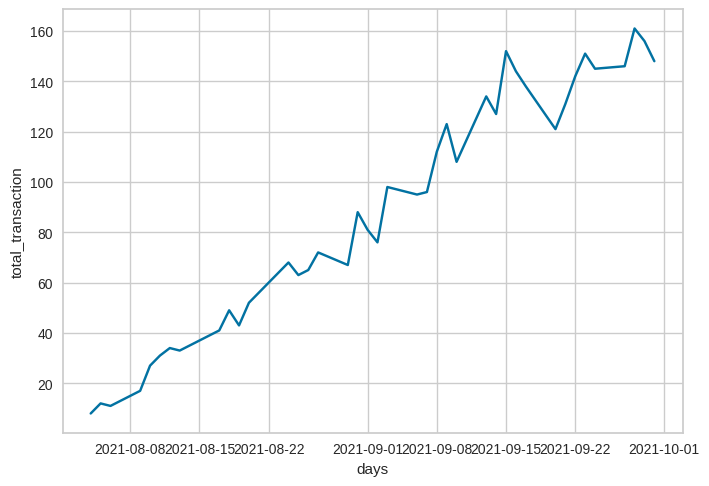

In [ ]:
sns.lineplot( x = "days",
             y = "total_transaction",
             data = eda_2);

## Habit between gender

In [ ]:
# make a dataframe copy
eda_3 = df_day.copy()

# extract Day and Date from the data

eda_3['date'] = eda_3['date'].dt.strftime('%Y-%m-%d').astype('datetime64')
eda_3['day'] = eda_3['date'].dt.day_name()
eda_3['days'] = eda_3['date'].dt.strftime('%w')

# create new dataframe to get the trend
eda_3 = eda_3.groupby(['day','days','user_gender'])['total_transaction'].agg('nunique').reset_index()
eda_3.columns = ['day','days','Gender','total_transaction']
eda_3.sort_values(by='days',ascending=True,inplace=True)
eda_3

,day,days,Gender,total_transaction
2,Monday,1,Female,185
3,Monday,1,Male,300
6,Tuesday,2,Female,200
7,Tuesday,2,Male,308
8,Wednesday,3,Female,207
9,Wednesday,3,Male,344
4,Thursday,4,Female,215
5,Thursday,4,Male,327
0,Friday,5,Female,179
1,Friday,5,Male,286


<ipython-input-141-5ddc428871db>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(x = 'day',


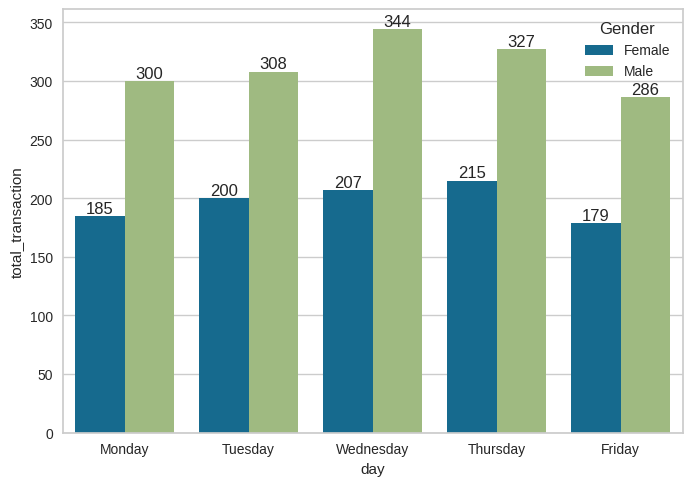

In [ ]:
ax = sns.barplot(x = 'day',
            y = 'total_transaction',
            data = eda_3,
            hue = 'Gender',
            estimator = np.sum,
            ci = 0)

for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
# make a dataframe copy
eda_4 = df_eop1.copy()

# create new data frame
eda_4 = eda_4.groupby('user_gender')['user_id'].agg('nunique').reset_index()
eda_4.columns = ['Gender','Num of User']
eda_4

,Gender,Num of User
0,Female,2858
1,Male,4901


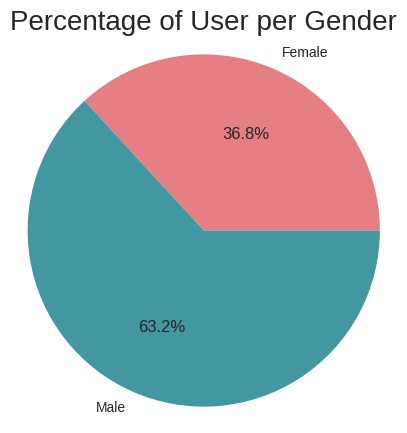

In [ ]:
plt.figure(figsize=(5, 5))

data = eda_4['Num of User']
labels = eda_4['Gender']

plt.pie(data,labels=labels,autopct='%1.1f%%',colors=('#E57F84','#4297A0'))
plt.title('Percentage of User per Gender', fontsize=20)
plt.axis('equal')
plt.show()

## Monthly trend transaction amount

In [ ]:
# make a dataframe copy
eda_5 = df_day.copy()

# extract MonthDate of time purchased
eda_5['date'] = eda_5['date'].apply(lambda x:x.strftime('%m-%d'))
eda_5.head()

# create new data frame to get the number of order
eda_5 = eda_5.groupby('date')['net'].agg('sum').reset_index()
eda_5.columns = ['date','transaction_amount']
eda_5

,date,transaction_amount
0,08-04,"3,570,522.0"
1,08-05,"9,280,000.0"
2,08-06,"3,691,000.0"
3,08-09,"2,317,959.0"
4,08-10,"14,563,877.0"
5,08-11,"32,184,656.0"
6,08-12,"15,480,813.0"
7,08-13,"18,805,841.0"
8,08-16,"30,021,544.0"
9,08-17,"15,800,620.0"


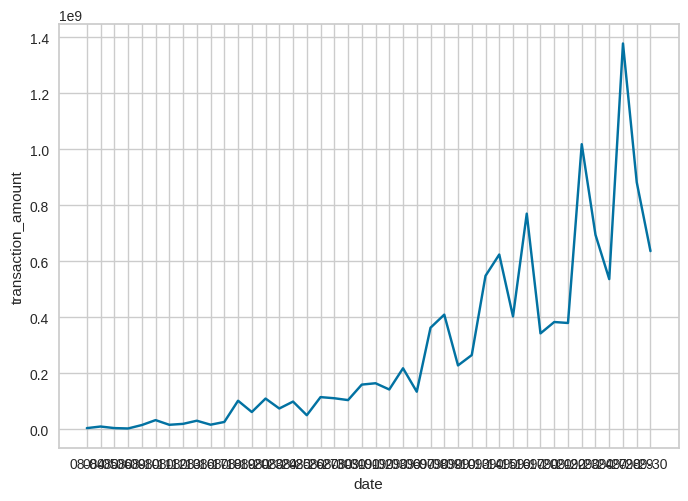

In [ ]:
sns.lineplot( x = "date",
             y = "transaction_amount",
             data = eda_5);

## Habit between user occupation

In [ ]:
# make a dataframe copy
eda_6 = df_day.copy()

# extract Day and Date from the data

eda_6['date'] = eda_6['date'].dt.strftime('%Y-%m-%d').astype('datetime64')
eda_6['day'] = eda_6['date'].dt.day_name()
eda_6['days'] = eda_6['date'].dt.strftime('%w')

# create new dataframe to get the trend
eda_6 = eda_6.groupby(['day','days','user_occupation'])['total_transaction'].agg('nunique').reset_index()
eda_6.columns = ['day','days','user occupation','trans_amount']
eda_6.sort_values(by='days',ascending=True,inplace=True)
eda_6

,day,days,user occupation,trans_amount
11,Monday,1,PNS,21
15,Monday,1,TNI/Polisi,9
14,Monday,1,Swasta,159
8,Monday,1,Guru,13
9,Monday,1,IRT,40
10,Monday,1,Others,76
13,Monday,1,Pengusaha,35
12,Monday,1,Pelajar,253
26,Tuesday,2,Others,74
27,Tuesday,2,PNS,21


<ipython-input-147-80ef126510a2>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(x = 'day',


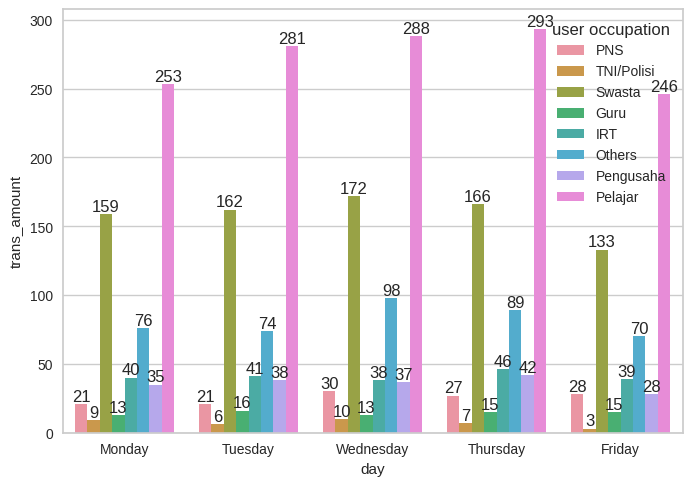

In [ ]:
ax = sns.barplot(x = 'day',
            y = 'trans_amount',
            data = eda_6,
            hue = 'user occupation',
            estimator = np.sum,
            ci = 0)

for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
# make a dataframe copy
eda_8 = df_eop1.copy()

# create new data frame
eda_8 = eda_8.groupby('user_occupation')['user_id'].agg('nunique').reset_index()
eda_8.columns = ['Occupation','Num of User']
eda_8

,Occupation,Num of User
0,Guru,48
1,IRT,350
2,Others,887
3,PNS,83
4,Pelajar,4473
5,Pengusaha,273
6,Swasta,1624
7,TNI/Polisi,21


In [ ]:
df_join1 = df_join1.copy()
df_join1[df_join1['user_occupation'].isin(['Guru','PNS','TNI/Polisi'])] = 'Others'

## Income Range

In [ ]:
# make a dataframe copy
eda_7 = df_day.copy()

# extract Day and Date from the data

eda_7['date'] = eda_7['date'].dt.strftime('%Y-%m-%d').astype('datetime64')
eda_7['day'] = eda_7['date'].dt.day_name()
eda_7['days'] = eda_7['date'].dt.strftime('%w')

# create new dataframe to get the trend
eda_7 = eda_7.groupby(['day','days','user_income_range'])['total_transaction'].agg('nunique').reset_index()
eda_7.columns = ['day','days','income','total trans']
eda_7.sort_values(by='days',ascending=True,inplace=True)
eda_7

,day,days,income,total trans
8,Monday,1,> Rp 100 Juta - 500 Juta,75
11,Monday,1,Rp 10 Juta - 50 Juta,164
10,Monday,1,> Rp 500 Juta - 1 Miliar,11
6,Monday,1,< 10 Juta,181
7,Monday,1,> Rp 1 Miliar,2
9,Monday,1,> Rp 50 Juta - 100 Juta,145
20,Tuesday,2,> Rp 100 Juta - 500 Juta,85
21,Tuesday,2,> Rp 50 Juta - 100 Juta,129
22,Tuesday,2,> Rp 500 Juta - 1 Miliar,12
18,Tuesday,2,< 10 Juta,215


<ipython-input-151-09d99e08313b>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(x = 'day',


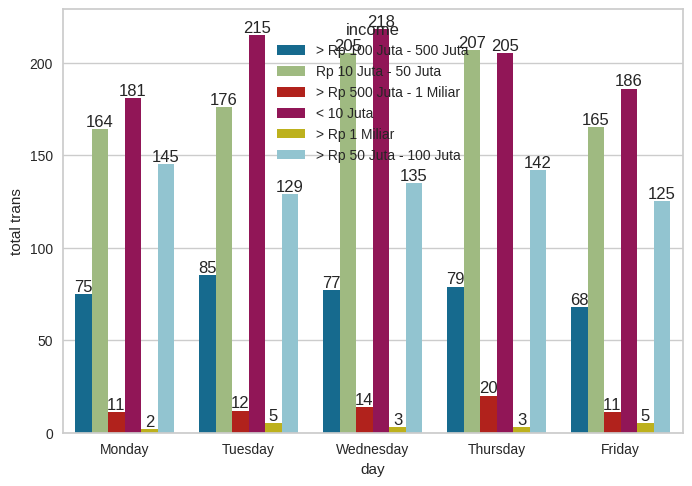

In [ ]:
ax = sns.barplot(x = 'day',
            y = 'total trans',
            data = eda_7,
            hue = 'income',
            estimator = np.sum,
            ci = 0)

for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
# make a dataframe copy
eda_9 = df_eop1.copy()

# create new data frame
eda_9 = eda_9.groupby('user_income_range')['user_id'].agg('nunique').reset_index()
eda_9.columns = ['Income Range','Num of User']
eda_9

,Income Range,Num of User
0,< 10 Juta,3425
1,> Rp 1 Miliar,13
2,> Rp 100 Juta - 500 Juta,511
3,> Rp 50 Juta - 100 Juta,1220
4,> Rp 500 Juta - 1 Miliar,33
5,Rp 10 Juta - 50 Juta,2557


# Clustering Process

In [ ]:
# # # df_day = df_day.groupby(["user_id"], as_index=False).agg({'date': 'max', 'total_transaction':'sum'})
# df[df.the_date_column > datetime.datetime.now() - pd.to_timedelta("30day")]
# df_day = df_day[df_day.total_transaction != 0]
# df_day

# # df_day = df_day.groupby(["user_id"], as_index=False).agg({'date': 'max', 'total_transaction':'sum'})
# # # Drop rows where total_transaction is 0
# # df_day = df_day[df_day.total_transaction != 0]

In [ ]:
df_day

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
0,1004326,2021-09-01,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"199,657.0","200,000.0",0.0,-343.0,0.0,0.0,0.0
1,1004326,2021-09-02,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,804.0","200,000.0",0.0,"1,804.0",0.0,0.0,0.0
2,1004326,2021-09-03,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,765.0","200,000.0",0.0,"1,765.0",0.0,0.0,0.0
3,1004326,2021-09-06,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,143.0","200,000.0",0.0,"1,143.0",0.0,0.0,0.0
4,1004326,2021-09-07,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,437.0","200,000.0",0.0,"1,437.0",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126606,997938,2021-09-24,27,Male,Others,Gaji,< 10 Juta,"301,331.0","300,000.0",0.0,"1,331.0",0.0,0.0,0.0
126607,997938,2021-09-27,27,Male,Others,Gaji,< 10 Juta,"301,059.0","300,000.0",0.0,"1,059.0",0.0,0.0,0.0
126608,997938,2021-09-28,27,Male,Others,Gaji,< 10 Juta,"299,666.0","300,000.0",0.0,-334.0,0.0,0.0,0.0
126609,997938,2021-09-29,27,Male,Others,Gaji,< 10 Juta,"300,160.0","300,000.0",0.0,160.0,0.0,0.0,0.0


In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126611 entries, 0 to 126610
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype    
---  ------              --------------   -----    
 0   user_id             126611 non-null  object   
 1   date                126611 non-null  period[D]
 2   user_age            126611 non-null  int64    
 3   user_gender         126611 non-null  object   
 4   user_occupation     126611 non-null  object   
 5   user_income_source  126611 non-null  object   
 6   user_income_range   126611 non-null  object   
 7   total_aum           126611 non-null  float64  
 8   total_invested      126611 non-null  float64  
 9   total_transaction   126611 non-null  float64  
 10  profit              126611 non-null  float64  
 11  buy                 126611 non-null  float64  
 12  sell                126611 non-null  float64  
 13  net                 126611 non-null  float64  
dtypes: float64(7), int64(1), object(5), period[D](1)
mem

In [ ]:
# rubah date dtype period to string

df_day['date'] = df_day['date'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126611 entries, 0 to 126610
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             126611 non-null  object 
 1   date                126611 non-null  object 
 2   user_age            126611 non-null  int64  
 3   user_gender         126611 non-null  object 
 4   user_occupation     126611 non-null  object 
 5   user_income_source  126611 non-null  object 
 6   user_income_range   126611 non-null  object 
 7   total_aum           126611 non-null  float64
 8   total_invested      126611 non-null  float64
 9   total_transaction   126611 non-null  float64
 10  profit              126611 non-null  float64
 11  buy                 126611 non-null  float64
 12  sell                126611 non-null  float64
 13  net                 126611 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 14.5+ MB


In [ ]:
# ubah date dtype jadi datetime

df_day['date'] = pd.to_datetime(df_day['date'])

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126611 entries, 0 to 126610
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   user_id             126611 non-null  object        
 1   date                126611 non-null  datetime64[ns]
 2   user_age            126611 non-null  int64         
 3   user_gender         126611 non-null  object        
 4   user_occupation     126611 non-null  object        
 5   user_income_source  126611 non-null  object        
 6   user_income_range   126611 non-null  object        
 7   total_aum           126611 non-null  float64       
 8   total_invested      126611 non-null  float64       
 9   total_transaction   126611 non-null  float64       
 10  profit              126611 non-null  float64       
 11  buy                 126611 non-null  float64       
 12  sell                126611 non-null  float64       
 13  net                 126611 no

In [ ]:
df_day

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
0,1004326,2021-09-01,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"199,657.0","200,000.0",0.0,-343.0,0.0,0.0,0.0
1,1004326,2021-09-02,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,804.0","200,000.0",0.0,"1,804.0",0.0,0.0,0.0
2,1004326,2021-09-03,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,765.0","200,000.0",0.0,"1,765.0",0.0,0.0,0.0
3,1004326,2021-09-06,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,143.0","200,000.0",0.0,"1,143.0",0.0,0.0,0.0
4,1004326,2021-09-07,30,Female,Pelajar,Gaji,> Rp 50 Juta - 100 Juta,"201,437.0","200,000.0",0.0,"1,437.0",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126606,997938,2021-09-24,27,Male,Others,Gaji,< 10 Juta,"301,331.0","300,000.0",0.0,"1,331.0",0.0,0.0,0.0
126607,997938,2021-09-27,27,Male,Others,Gaji,< 10 Juta,"301,059.0","300,000.0",0.0,"1,059.0",0.0,0.0,0.0
126608,997938,2021-09-28,27,Male,Others,Gaji,< 10 Juta,"299,666.0","300,000.0",0.0,-334.0,0.0,0.0,0.0
126609,997938,2021-09-29,27,Male,Others,Gaji,< 10 Juta,"300,160.0","300,000.0",0.0,160.0,0.0,0.0,0.0


In [ ]:
# filter transaction past 30 days
df_day = df_day.loc[(df_day['date'] >= '2021-09-01')
                     & (df_day['date'] < '2021-09-30')]

# active transaction = total transaction != 0
df_day = df_day[df_day.total_transaction != 0]

In [ ]:
df_day

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
90,1024581,2021-09-15,25,Male,Pelajar,Gaji,Rp 10 Juta - 50 Juta,"124,878.0","125,000.0","25,000.0",-122.0,"25,000.0",0.0,"25,000.0"
94,1024581,2021-09-21,25,Male,Pelajar,Gaji,Rp 10 Juta - 50 Juta,0.0,0.0,"-125,000.0",0.0,0.0,"-125,000.0","125,000.0"
105,103108,2021-09-22,42,Male,Swasta,Gaji,> Rp 500 Juta - 1 Miliar,"12,050,771.0","12,000,000.0","2,000,000.0","50,771.0","2,000,000.0",0.0,"2,000,000.0"
109,103108,2021-09-28,42,Male,Swasta,Gaji,> Rp 500 Juta - 1 Miliar,"16,184,919.0","16,000,000.0","3,000,000.0","184,919.0","3,000,000.0",0.0,"3,000,000.0"
121,103538,2021-09-27,18,Male,Others,Dari Orang Tua / Anak,< 10 Juta,0.0,0.0,"-100,000.0",0.0,0.0,"-100,000.0","100,000.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126550,989618,2021-09-24,29,Male,Pelajar,Gaji,< 10 Juta,"1,999,002.0","2,000,000.0","1,000,000.0",-998.0,"1,000,000.0",0.0,"1,000,000.0"
126562,990466,2021-09-16,33,Male,Swasta,Gaji,< 10 Juta,"2,015,010.0","2,000,000.0","500,000.0","15,010.0","500,000.0",0.0,"500,000.0"
126564,990466,2021-09-20,33,Male,Swasta,Gaji,< 10 Juta,"2,263,292.0","2,240,000.0","240,000.0","23,292.0","240,000.0",0.0,"240,000.0"
126565,990466,2021-09-21,33,Male,Swasta,Gaji,< 10 Juta,"3,045,782.0","3,000,000.0","760,000.0","45,782.0","760,000.0",0.0,"760,000.0"


In [ ]:
# create df_cluster from df_eop.copy()
df_cluster = df_day.copy()

In [ ]:
# change data  categorical string to numeric (encoding)
# use encoding (not one hot encoding) is because i have a lot of categorical data
df_cluster['user_gender'] = df_cluster['user_gender'].astype('category')
df_cluster['user_gender'] = df_cluster['user_gender'].cat.codes

In [ ]:
df_cluster['user_occupation'] = df_cluster['user_occupation'].astype('category')
df_cluster['user_occupation'] = df_cluster['user_occupation'].cat.codes

In [ ]:
df_cluster['user_income_source'] = df_cluster['user_income_source'].astype('category')
df_cluster['user_income_source'] = df_cluster['user_income_source'].cat.codes

In [ ]:
df_cluster['user_income_range'] = df_cluster['user_income_range'].astype('category')
df_cluster['user_income_range'] = df_cluster['user_income_range'].cat.codes

In [ ]:
df_cluster

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
90,1024581,2021-09-15,25,1,4,3,5,"124,878.0","125,000.0","25,000.0",-122.0,"25,000.0",0.0,"25,000.0"
94,1024581,2021-09-21,25,1,4,3,5,0.0,0.0,"-125,000.0",0.0,0.0,"-125,000.0","125,000.0"
105,103108,2021-09-22,42,1,6,3,4,"12,050,771.0","12,000,000.0","2,000,000.0","50,771.0","2,000,000.0",0.0,"2,000,000.0"
109,103108,2021-09-28,42,1,6,3,4,"16,184,919.0","16,000,000.0","3,000,000.0","184,919.0","3,000,000.0",0.0,"3,000,000.0"
121,103538,2021-09-27,18,1,2,1,0,0.0,0.0,"-100,000.0",0.0,0.0,"-100,000.0","100,000.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126550,989618,2021-09-24,29,1,4,3,0,"1,999,002.0","2,000,000.0","1,000,000.0",-998.0,"1,000,000.0",0.0,"1,000,000.0"
126562,990466,2021-09-16,33,1,6,3,0,"2,015,010.0","2,000,000.0","500,000.0","15,010.0","500,000.0",0.0,"500,000.0"
126564,990466,2021-09-20,33,1,6,3,0,"2,263,292.0","2,240,000.0","240,000.0","23,292.0","240,000.0",0.0,"240,000.0"
126565,990466,2021-09-21,33,1,6,3,0,"3,045,782.0","3,000,000.0","760,000.0","45,782.0","760,000.0",0.0,"760,000.0"


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7556 entries, 90 to 126597
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             7556 non-null   object        
 1   date                7556 non-null   datetime64[ns]
 2   user_age            7556 non-null   int64         
 3   user_gender         7556 non-null   int8          
 4   user_occupation     7556 non-null   int8          
 5   user_income_source  7556 non-null   int8          
 6   user_income_range   7556 non-null   int8          
 7   total_aum           7556 non-null   float64       
 8   total_invested      7556 non-null   float64       
 9   total_transaction   7556 non-null   float64       
 10  profit              7556 non-null   float64       
 11  buy                 7556 non-null   float64       
 12  sell                7556 non-null   float64       
 13  net                 7556 non-null   float64  

In [ ]:
num_column = ['user_age','user_gender', 'user_occupation', 'user_income_source',
              'user_income_range','total_aum','total_invested','total_transaction','profit','buy','sell','net']

In [ ]:
# implementasi MinMaxScaler di seluruh data numeric
scaler = MinMaxScaler() #Transform datanya supaya dia berubah dari range asal menjadi range 0-1

# scaler = StandardScaler()
# numerical_column.append('Education_Category')
df_cluster[num_column] = scaler.fit_transform(df_cluster[num_column])
df_cluster

,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
90,1024581,2021-09-15,0.3076923076923077,1.0,0.5714285714285714,0.3333333333333333,1.0,6.153911815223288e-05,6.174669037739577e-05,0.3162820512820513,0.2665068857354323,6.25e-05,1.0,6.249750015624375e-05
94,1024581,2021-09-21,0.3076923076923077,1.0,0.5714285714285714,0.3333333333333333,1.0,0.0,0.0,0.316025641025641,0.2665142550359051,0.0,0.9993243243243243,0.00031249750078124374
105,103108,2021-09-22,0.9615384615384616,1.0,0.8571428571428571,0.3333333333333333,0.8,0.005938546584622604,0.005927682276229994,0.31965811965811963,0.2695810317105227,0.005,1.0,0.004999997512499994
109,103108,2021-09-28,0.9615384615384616,1.0,0.8571428571428571,0.3333333333333333,0.8,0.007975829550643979,0.007903576368306658,0.32136752136752134,0.27768412121726105,0.007500000000000001,1.0,0.007499997518749994
121,103538,2021-09-27,0.038461538461538436,1.0,0.2857142857142857,0.1111111111111111,0.0,0.0,0.0,0.31606837606837607,0.2665142550359051,0.0,0.9994594594594595,0.00024999750062499373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126550,989618,2021-09-24,0.46153846153846156,1.0,0.5714285714285714,0.3333333333333333,0.0,0.0009850960158278466,0.0009879470460383323,0.31794871794871793,0.2664539717418737,0.0025,1.0,0.002499997506249994
126562,990466,2021-09-16,0.6153846153846155,1.0,0.8571428571428571,0.3333333333333333,0.0,0.0009929846607723601,0.0009879470460383323,0.3170940170940171,0.2674209206104656,0.00125,1.0,0.0012499975031249938
126564,990466,2021-09-20,0.6153846153846155,1.0,0.8571428571428571,0.3333333333333333,0.0,0.0011153365188504257,0.0011065006915629322,0.31664957264957266,0.2679211873851831,0.0006000000000000001,1.0,0.0005999975014999938
126565,990466,2021-09-21,0.6153846153846155,1.0,0.8571428571428571,0.3333333333333333,0.0,0.0015009428271108136,0.0014819205690574985,0.31753846153846155,0.269279675644468,0.0019,1.0,0.0018999975047499938


# Cluster Analysis

Cluster Analysis:
  - determine cluster number
    - elbow method
    - silhoutte analysis
  - create cluster
  - check agg for each cluster
  - naming

In [ ]:
# hapus columns categorical string
df_cluster = df_cluster.drop(['user_id','date'],axis=1)

In [ ]:
df_cluster

,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net
90,0.3076923076923077,1.0,0.5714285714285714,0.3333333333333333,1.0,6.153911815223288e-05,6.174669037739577e-05,0.3162820512820513,0.2665068857354323,6.25e-05,1.0,6.249750015624375e-05
94,0.3076923076923077,1.0,0.5714285714285714,0.3333333333333333,1.0,0.0,0.0,0.316025641025641,0.2665142550359051,0.0,0.9993243243243243,0.00031249750078124374
105,0.9615384615384616,1.0,0.8571428571428571,0.3333333333333333,0.8,0.005938546584622604,0.005927682276229994,0.31965811965811963,0.2695810317105227,0.005,1.0,0.004999997512499994
109,0.9615384615384616,1.0,0.8571428571428571,0.3333333333333333,0.8,0.007975829550643979,0.007903576368306658,0.32136752136752134,0.27768412121726105,0.007500000000000001,1.0,0.007499997518749994
121,0.038461538461538436,1.0,0.2857142857142857,0.1111111111111111,0.0,0.0,0.0,0.31606837606837607,0.2665142550359051,0.0,0.9994594594594595,0.00024999750062499373
...,...,...,...,...,...,...,...,...,...,...,...,...
126550,0.46153846153846156,1.0,0.5714285714285714,0.3333333333333333,0.0,0.0009850960158278466,0.0009879470460383323,0.31794871794871793,0.2664539717418737,0.0025,1.0,0.002499997506249994
126562,0.6153846153846155,1.0,0.8571428571428571,0.3333333333333333,0.0,0.0009929846607723601,0.0009879470460383323,0.3170940170940171,0.2674209206104656,0.00125,1.0,0.0012499975031249938
126564,0.6153846153846155,1.0,0.8571428571428571,0.3333333333333333,0.0,0.0011153365188504257,0.0011065006915629322,0.31664957264957266,0.2679211873851831,0.0006000000000000001,1.0,0.0005999975014999938
126565,0.6153846153846155,1.0,0.8571428571428571,0.3333333333333333,0.0,0.0015009428271108136,0.0014819205690574985,0.31753846153846155,0.269279675644468,0.0019,1.0,0.0018999975047499938


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

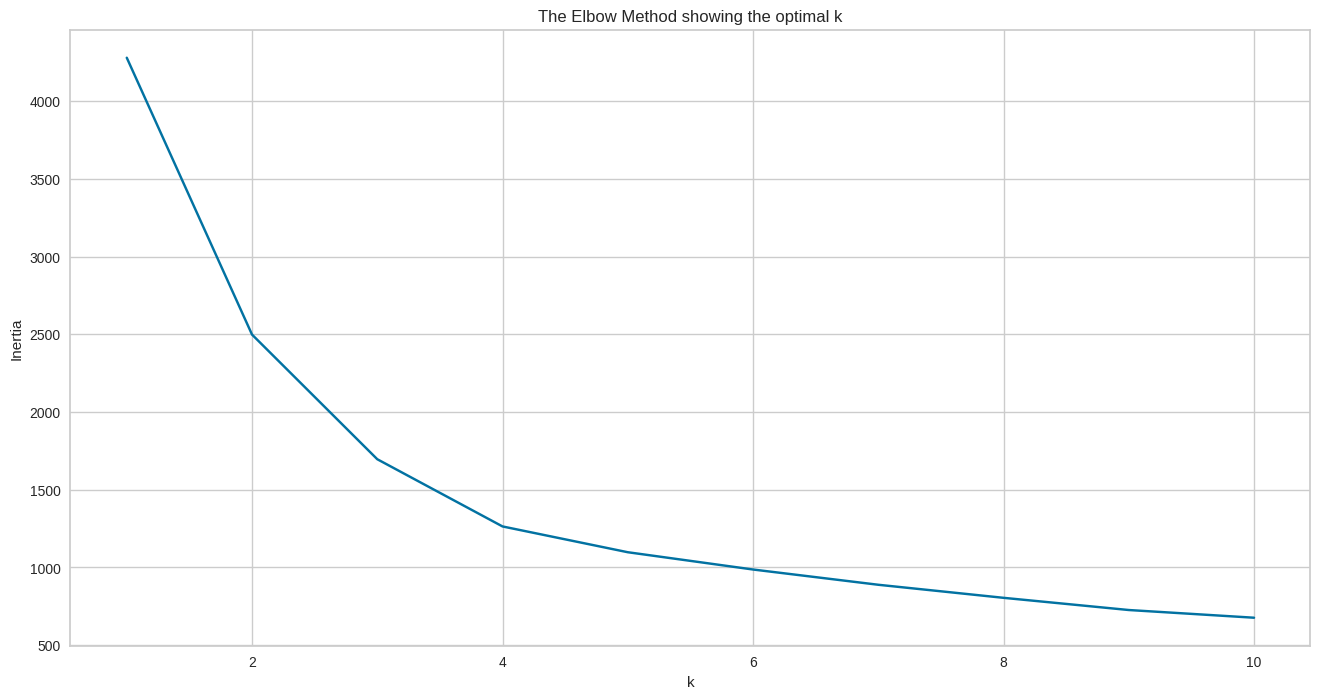

In [ ]:
# visualization dari inertia untuk menentukan N Clusters
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the average silhouette score is 0.41934868155882604


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the average silhouette score is 0.42025019319593976


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the average silhouette score is 0.4491490386668894


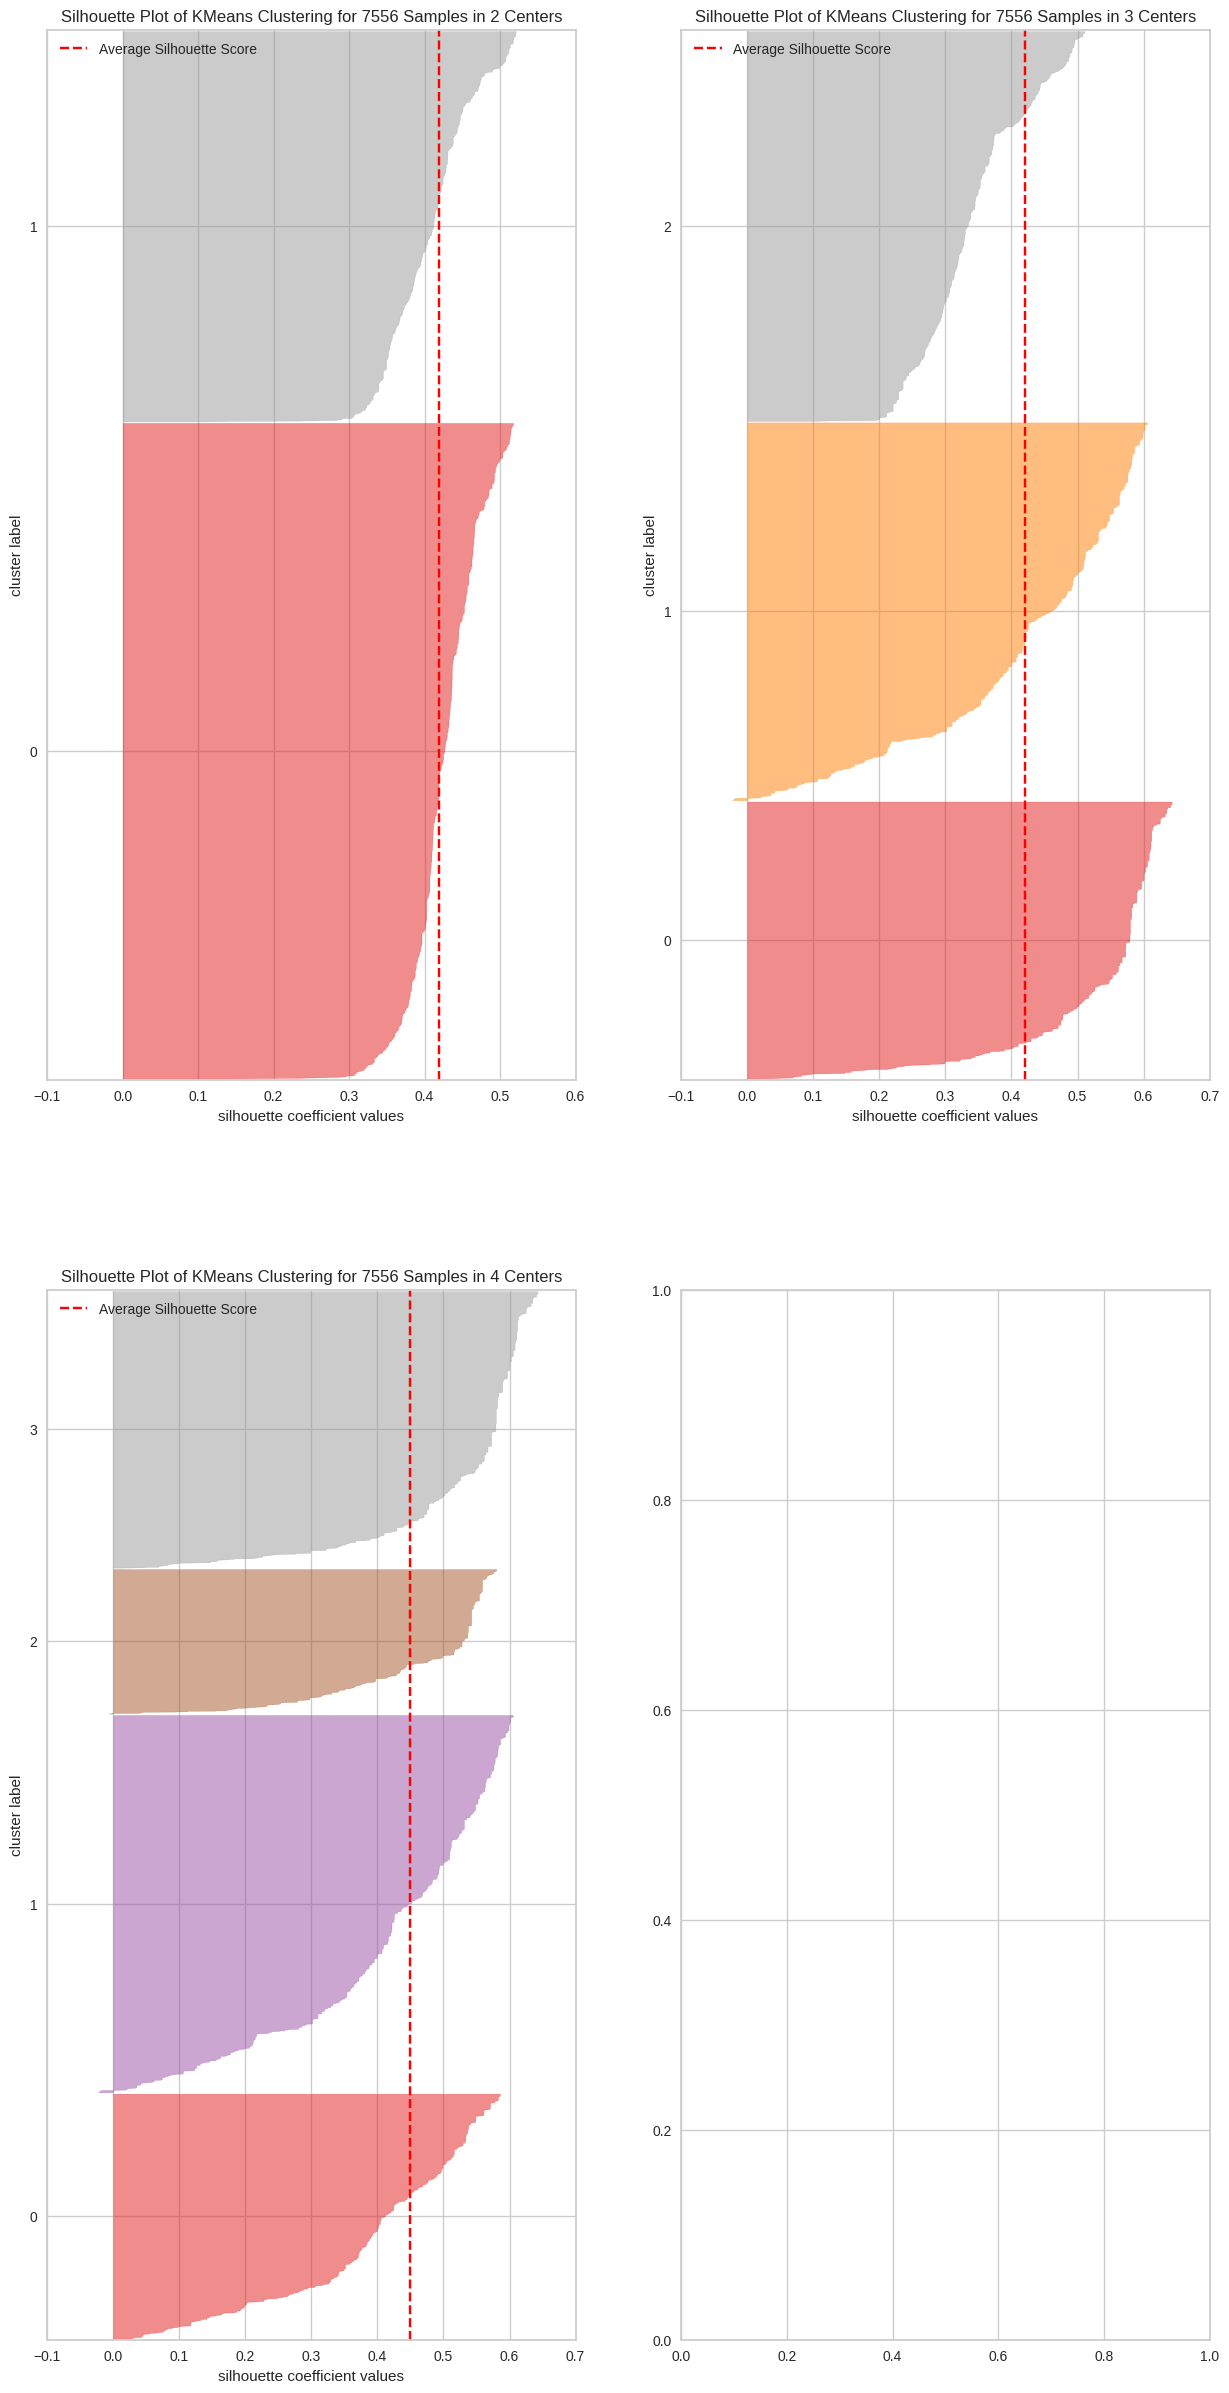

In [ ]:
# Silhouette score plot
K = range(2,5)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_cluster)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
# check info
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7556 entries, 90 to 126597
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_age            7556 non-null   float64
 1   user_gender         7556 non-null   float64
 2   user_occupation     7556 non-null   float64
 3   user_income_source  7556 non-null   float64
 4   user_income_range   7556 non-null   float64
 5   total_aum           7556 non-null   float64
 6   total_invested      7556 non-null   float64
 7   total_transaction   7556 non-null   float64
 8   profit              7556 non-null   float64
 9   buy                 7556 non-null   float64
 10  sell                7556 non-null   float64
 11  net                 7556 non-null   float64
dtypes: float64(12)
memory usage: 767.4 KB


In [ ]:
# implement clustering Kmeans dengan N Cluster = 4
cluster_model = cluster.KMeans(n_clusters=4, random_state = 42)
cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
df_day['cluster'] = cluster_label
# df3 = df_cluster.copy()
# df3['cluster'] = cluster_model.labels_
# df3
df_day

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,date,user_age,user_gender,user_occupation,user_income_source,user_income_range,total_aum,total_invested,total_transaction,profit,buy,sell,net,cluster
90,1024581,2021-09-15,25,Male,Pelajar,Gaji,Rp 10 Juta - 50 Juta,"124,878.0","125,000.0","25,000.0",-122.0,"25,000.0",0.0,"25,000.0",1
94,1024581,2021-09-21,25,Male,Pelajar,Gaji,Rp 10 Juta - 50 Juta,0.0,0.0,"-125,000.0",0.0,0.0,"-125,000.0","125,000.0",1
105,103108,2021-09-22,42,Male,Swasta,Gaji,> Rp 500 Juta - 1 Miliar,"12,050,771.0","12,000,000.0","2,000,000.0","50,771.0","2,000,000.0",0.0,"2,000,000.0",1
109,103108,2021-09-28,42,Male,Swasta,Gaji,> Rp 500 Juta - 1 Miliar,"16,184,919.0","16,000,000.0","3,000,000.0","184,919.0","3,000,000.0",0.0,"3,000,000.0",1
121,103538,2021-09-27,18,Male,Others,Dari Orang Tua / Anak,< 10 Juta,0.0,0.0,"-100,000.0",0.0,0.0,"-100,000.0","100,000.0",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126550,989618,2021-09-24,29,Male,Pelajar,Gaji,< 10 Juta,"1,999,002.0","2,000,000.0","1,000,000.0",-998.0,"1,000,000.0",0.0,"1,000,000.0",2
126562,990466,2021-09-16,33,Male,Swasta,Gaji,< 10 Juta,"2,015,010.0","2,000,000.0","500,000.0","15,010.0","500,000.0",0.0,"500,000.0",2
126564,990466,2021-09-20,33,Male,Swasta,Gaji,< 10 Juta,"2,263,292.0","2,240,000.0","240,000.0","23,292.0","240,000.0",0.0,"240,000.0",2
126565,990466,2021-09-21,33,Male,Swasta,Gaji,< 10 Juta,"3,045,782.0","3,000,000.0","760,000.0","45,782.0","760,000.0",0.0,"760,000.0",2


In [ ]:
# df3.groupby('cluster')['user_id'].agg(['count'])

In [ ]:
df_day.groupby(['cluster'])['total_transaction'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1773,"1,743,108.3671742808","100,000.0","400,000,000.0","-185,000,000.0"
1,2733,"670,628.7431394072","100,000.0","250,000,000.0","-100,000,000.0"
2,2003,"799,865.6200698952","20,000.0","350,000,000.0","-27,154,900.0"
3,1047,"280,091.66189111746","30,000.0","25,000,000.0","-15,656,238.0"


In [ ]:
df_day.groupby(['cluster'])['user_age'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1773,29.375070501974054,29.0,43,17
1,2733,28.99451152579583,29.0,43,17
2,2003,23.03145282076885,21.0,43,17
3,1047,24.30085959885387,22.0,43,17


In [ ]:
df_day.groupby(['cluster'])['user_occupation'].describe()

,count,unique,top,freq
cluster,,,,
0,1773,7,Pelajar,691
1,2733,8,Pelajar,1055
2,2003,7,Pelajar,1451
3,1047,7,Pelajar,711


In [ ]:
df_day.groupby(['cluster'])['user_income_range'].describe()

,count,unique,top,freq
cluster,,,,
0,1773,4,Rp 10 Juta - 50 Juta,894
1,2733,5,Rp 10 Juta - 50 Juta,1514
2,2003,3,< 10 Juta,1949
3,1047,3,< 10 Juta,1026


In [ ]:
df_day.groupby(['cluster'])['user_income_source'].describe()

,count,unique,top,freq
cluster,,,,
0,1773,9,Gaji,1322
1,2733,9,Gaji,2172
2,2003,9,Gaji,955
3,1047,10,Gaji,409


In [ ]:
df_day.groupby(['cluster']).agg(['mean','min','max','std'])

<ipython-input-184-9196a97a0652>:1: FutureWarning: ['date', 'user_gender', 'user_occupation', 'user_income_source', 'user_income_range'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_day.groupby(['cluster']).agg(['mean','min','max','std'])


user_id                                               user_age      \
           mean      min     max                std               mean min   
cluster                                                                      
0           inf  1116654  956120 752,497.4260948452 29.375070501974054  17   
1           inf  1024581  979998 774,877.1500792139  28.99451152579583  17   
2           inf   103538  997938 871,922.1870569912  23.03145282076885  17   
3           inf  1081443  980906 671,230.3475195256  24.30085959885387  17   

                                          total_aum      ...           buy  \
        max                std                 mean min  ...           max   
cluster                                                  ...                 
0        43  5.758572867049349 15,076,523.528482797 0.0  ... 400,000,000.0   
1        43  6.105733740257039  5,885,372.508964508 0.0  ... 250,000,000.0   
2        43  5.109638033687954  6,494,491.562156765 0.0  ... 350,000,000.0   
3        43 5.9013746678000745 1,889,175.8748806112 0.0  ...  25,000,000.0   

                                             sell                     \
                         std                 mean            min max   
cluster                                                                
0       15,533,103.178516787 -282,095.66610265087 -185,000,000.0 0.0   
1        6,504,273.533980147  -303,414.4039517014 -100,000,000.0 0.0   
2        12,067,384.65127727  -95,775.84722915626  -27,154,900.0 0.0   
3       1,649,302.2817187216  -85,592.99426934097  -15,656,238.0 0.0   

                                              net                        \
                         std                 mean     min           max   
cluster                                                                   
0        4,601,667.523238239 2,307,299.6993795824     1.0 400,000,000.0   
1       2,718,441.7269473993   1,277,457.55104281   557.0 250,000,000.0   
2         688,566.5642878661   991,417.3145282076   443.0 350,000,000.0   
3         584,743.5410677097  451,277.65042979945 5,000.0  25,000,000.0   

                              
                         std  
cluster                       
0       16,165,066.995771496  
1        7,007,439.320640949  
2       12,079,910.964056145  
3       1,731,895.8077271779  

[4 rows x 36 columns]